<a href="https://colab.research.google.com/github/danish-khan962/Deep-Learning/blob/main/miscellaneous/07_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EXERCISE 7**

Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [1]:
# Importing tensorflow
import tensorflow as tf
print("Tensorflow we're using: ", tf.__version__)

Tensorflow we're using:  2.18.0


In [15]:
# Importing other dependencies
import numpy as np
import matplotlib.pyplot as plt

In [16]:
# Creating features
X = tf.range(-50, 200, 8) # from -50 to 200 with a set gap of 8
X

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([-50, -42, -34, -26, -18, -10,  -2,   6,  14,  22,  30,  38,  46,
        54,  62,  70,  78,  86,  94, 102, 110, 118, 126, 134, 142, 150,
       158, 166, 174, 182, 190, 198], dtype=int32)>

In [17]:
# Creating labels
y = X + 10
y

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([-40, -32, -24, -16,  -8,   0,   8,  16,  24,  32,  40,  48,  56,
        64,  72,  80,  88,  96, 104, 112, 120, 128, 136, 144, 152, 160,
       168, 176, 184, 192, 200, 208], dtype=int32)>

In [18]:
# Let's convert int32 to float32 for no future issues
X = tf.cast(X, dtype=tf.float32)
y = tf.cast(y, dtype=tf.float32)
X, y

(<tf.Tensor: shape=(32,), dtype=float32, numpy=
 array([-50., -42., -34., -26., -18., -10.,  -2.,   6.,  14.,  22.,  30.,
         38.,  46.,  54.,  62.,  70.,  78.,  86.,  94., 102., 110., 118.,
        126., 134., 142., 150., 158., 166., 174., 182., 190., 198.],
       dtype=float32)>,
 <tf.Tensor: shape=(32,), dtype=float32, numpy=
 array([-40., -32., -24., -16.,  -8.,   0.,   8.,  16.,  24.,  32.,  40.,
         48.,  56.,  64.,  72.,  80.,  88.,  96., 104., 112., 120., 128.,
        136., 144., 152., 160., 168., 176., 184., 192., 200., 208.],
       dtype=float32)>)

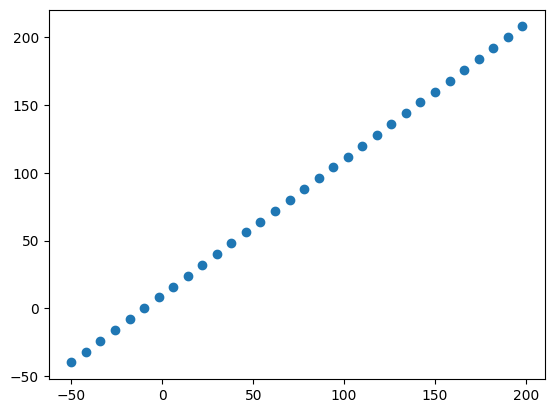

In [19]:
### Visualizing the data points
plt.scatter(X,y)

### Training and testing set

In [20]:
len(X)

32

In [24]:
# Splitting into training datasets
X_train = X[:22]
y_train = y[:22]

# Splitting into testing datasets
X_test = X[22:]
y_test = y[22:]

In [25]:
len(X_train), len(X_test), len(y_train), len(y_test)

(22, 10, 22, 10)

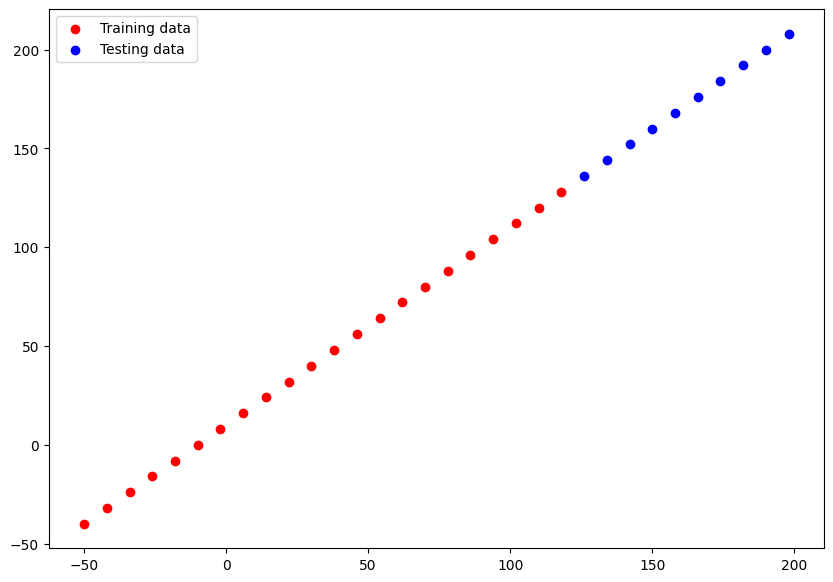

In [26]:
# Visualing the training and testing sets
plt.figure(figsize=(10,7))

# Plotting training data
plt.scatter(X_train, y_train, c="r", label="Training data")

# Plotting testing data
plt.scatter(X_test, y_test, c="b", label="Testing data")

plt.legend()


### Creating the neural network model

In [27]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=float32, numpy=-50.0>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-40.0>)

##### One feature deriving a label hence input_shape can be 1

In [28]:
# Let's create the model

tf.random.set_seed(42)  # setting random seed for reproducability

# 1. Creating a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])  # input_shape for automatic build of model
])

# 2. Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [29]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Let's fit the model
model.fit(X, y, epochs=100, verbose=0)

### Increasing dense layer to see the effect on model.summary()

In [44]:
tf.random.set_seed(42)  # setting random seed for reproducability

# 1. Creating a model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(3, input_shape=[1]),  # input_shape for automatic build of model
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [45]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                 │ (None, 3)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10 (40.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 0 (0.00 B)

In [46]:
# Let's fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100, verbose=0)